In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu tiền ảo
df = pd.read_csv('BNB2019-2024.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [4]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)



In [5]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_index)

Predicted closing prices for the next 30 days:
[554.49719344 554.82527949 555.15336555 555.4814516  555.80953766
 556.13762372 556.46570977 556.79379583 557.12188189 557.44996794
 557.778054   558.10614006 558.43422611 558.76231217 559.09039823
 559.41848428 559.74657034 560.07465639 560.40274245 560.73082851
 561.05891456 561.38700062 561.71508668 562.04317273 562.37125879
 562.69934485 563.0274309  563.35551696 563.68360301 564.01168907]
1814


In [6]:
# 7. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data2 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[554.49719344 554.82527949 555.15336555 555.4814516  555.80953766
 556.13762372 556.46570977 556.79379583 557.12188189 557.44996794
 557.778054   558.10614006 558.43422611 558.76231217 559.09039823
 559.41848428 559.74657034 560.07465639 560.40274245 560.73082851
 561.05891456 561.38700062 561.71508668 562.04317273 562.37125879
 562.69934485 563.0274309  563.35551696 563.68360301 564.01168907
 564.33977513 564.66786118 564.99594724 565.3240333  565.65211935
 565.98020541 566.30829147 566.63637752 566.96446358 567.29254964
 567.62063569 567.94872175 568.2768078  568.60489386 568.93297992
 569.26106597 569.58915203 569.91723809 570.24532414 570.5734102
 570.90149626 571.22958231 571.55766837 571.88575442 572.21384048
 572.54192654 572.87001259 573.19809865 573.52618471 573.85427076]


In [7]:
# 8. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data3 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[554.49719344 554.82527949 555.15336555 555.4814516  555.80953766
 556.13762372 556.46570977 556.79379583 557.12188189 557.44996794
 557.778054   558.10614006 558.43422611 558.76231217 559.09039823
 559.41848428 559.74657034 560.07465639 560.40274245 560.73082851
 561.05891456 561.38700062 561.71508668 562.04317273 562.37125879
 562.69934485 563.0274309  563.35551696 563.68360301 564.01168907
 564.33977513 564.66786118 564.99594724 565.3240333  565.65211935
 565.98020541 566.30829147 566.63637752 566.96446358 567.29254964
 567.62063569 567.94872175 568.2768078  568.60489386 568.93297992
 569.26106597 569.58915203 569.91723809 570.24532414 570.5734102
 570.90149626 571.22958231 571.55766837 571.88575442 572.21384048
 572.54192654 572.87001259 573.19809865 573.52618471 573.85427076
 574.18235682 574.51044288 574.83852893 575.16661499 575.49470105
 575.8227871  576.15087316 576.47895921 576.80704527 577.13513133
 577.46321738 577.79130344 578

In [8]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Testing RMSE:', test_rmse)


Testing RMSE: 234.89431806998059


Testing RMSE: 234.89431806998059
Testing MAPE: 89.8492648550144
Testing MSE: 55175.34066156121


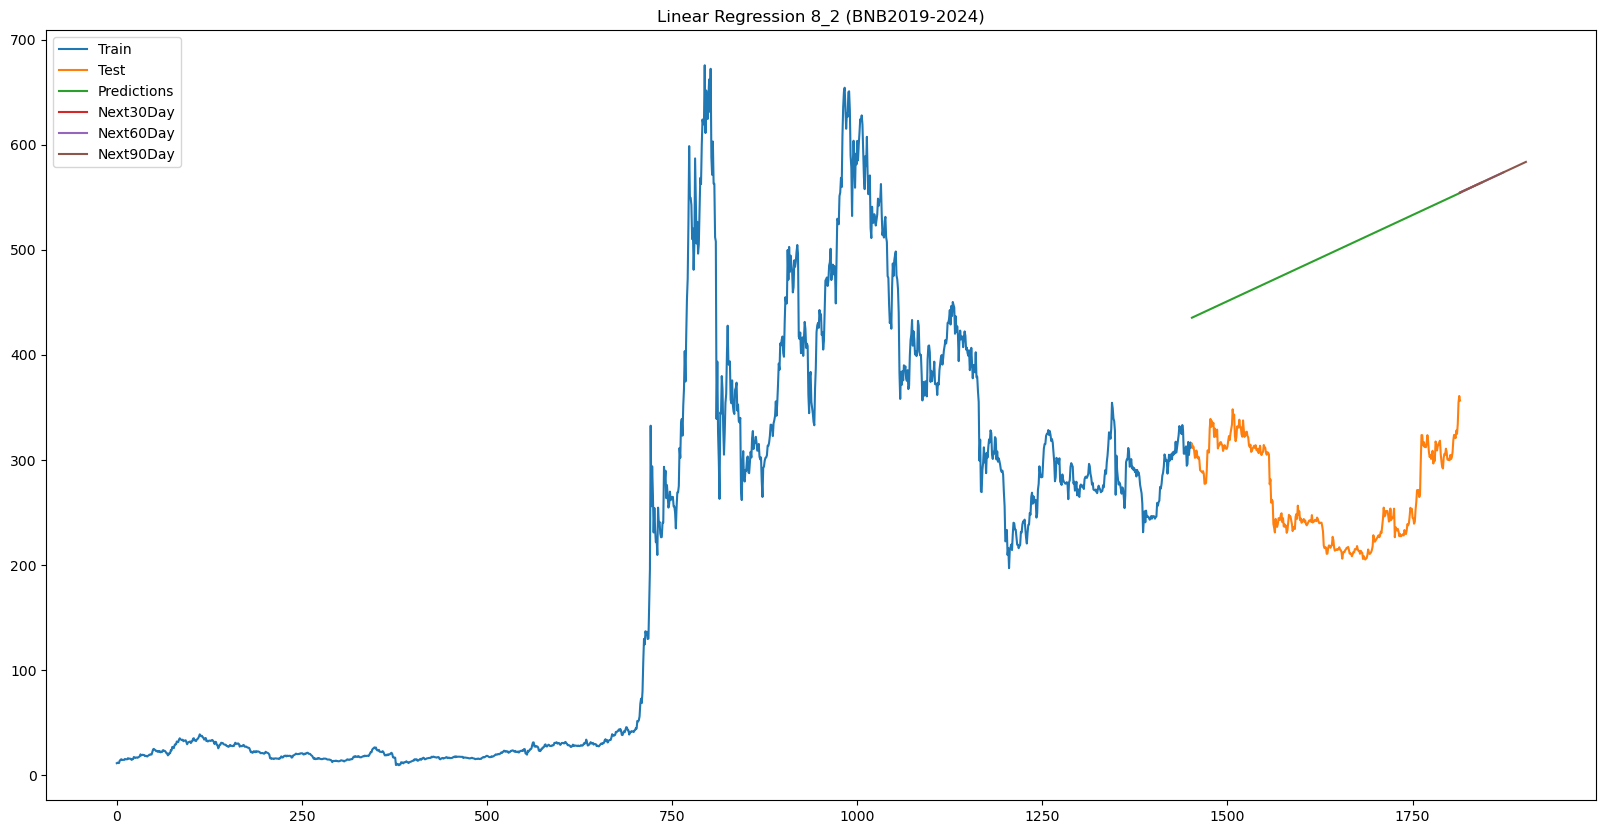

In [9]:
# 8. Tính RMSE
plt.figure(figsize=(20, 10))
plt.title('Linear Regression 8_2 (BNB2019-2024)')
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Testing MAPE:', test_mape)
# Tính MSE
test_mse = np.mean((y_pred - y_test) ** 2)
print('Testing MSE:', test_mse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data1,y_next_30_days)
plt.plot(last_data2,y_next_60_days)
plt.plot(last_data3,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

In [10]:
test_data.index

RangeIndex(start=1452, stop=1815, step=1)